In [1004]:
import mysql.connector

import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [1005]:
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='!@QWaszx23we',
    database='car_data'
)

cursor = connection.cursor()
query = "SELECT * FROM car_info"
df = pd.read_sql(query, connection)

C:\Users\Maya\AppData\Local\Temp\ipykernel_10620\4052459082.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [1006]:
print(df.head(5))
print(df.tail(5))  

  Make       Model  Year             Engine_Fuel_Type  Engine_HP  \
0  BMW  1 Series M  2011  premium unleaded (required)     335.00   
1  BMW    1 Series  2011  premium unleaded (required)     300.00   
2  BMW    1 Series  2011  premium unleaded (required)     300.00   
3  BMW    1 Series  2011  premium unleaded (required)     230.00   
4  BMW    1 Series  2011  premium unleaded (required)     230.00   

   Engine_Cylinders Transmission_Type     Driven_Wheels  Number_of_Doors  \
0                 6            MANUAL  rear wheel drive                2   
1                 6            MANUAL  rear wheel drive                2   
2                 6            MANUAL  rear wheel drive                2   
3                 6            MANUAL  rear wheel drive                2   
4                 6            MANUAL  rear wheel drive                2   

                         Market_Category Vehicle_Size Vehicle_Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [1007]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders       int64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors        int64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
Highway_MPG            int64
City_MPG               int64
Popularity             int64
MSRP                   int64
dtype: object

In [1008]:
df = df.drop(['Engine_Fuel_Type', 'Popularity', 'Number_of_Doors'], axis=1)
df.head(5)

,Make,Model,Year,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,MSRP
0,BMW,1 Series M,2011,335.00,6,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.00,6,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.00,6,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.00,6,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.00,6,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,34500


In [1009]:
df = df.rename(columns={"Engine_HP": "HP", "Engine_Cylinders": "Cylinders", "Transmission_Type": "Transmission", "Driven_Wheels": "Drive Mode","highway_MPG": "MPG-H", "city_mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Price
0,BMW,1 Series M,2011,335.00,6,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.00,6,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.00,6,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.00,6,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.00,6,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,34500


In [1010]:
df.shape

(11914, 13)

In [1011]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (716, 13)


In [1012]:
df.count() 

Make               11914
Model              11914
Year               11914
HP                 11914
Cylinders          11914
Transmission       11914
Drive Mode         11914
Market_Category    11914
Vehicle_Size       11914
Vehicle_Style      11914
Highway_MPG        11914
City_MPG           11914
Price              11914
dtype: int64

In [1013]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Price
0,BMW,1 Series M,2011,335.00,6,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.00,6,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.00,6,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.00,6,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.00,6,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,34500


In [1014]:
df.count()

Make               11198
Model              11198
Year               11198
HP                 11198
Cylinders          11198
Transmission       11198
Drive Mode         11198
Market_Category    11198
Vehicle_Size       11198
Vehicle_Style      11198
Highway_MPG        11198
City_MPG           11198
Price              11198
dtype: int64

In [1015]:
print(df.isnull().sum())

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Market_Category    0
Vehicle_Size       0
Vehicle_Style      0
Highway_MPG        0
City_MPG           0
Price              0
dtype: int64


In [1016]:
df = df.dropna()
df.count()

Make               11198
Model              11198
Year               11198
HP                 11198
Cylinders          11198
Transmission       11198
Drive Mode         11198
Market_Category    11198
Vehicle_Size       11198
Vehicle_Style      11198
Highway_MPG        11198
City_MPG           11198
Price              11198
dtype: int64

In [1017]:
df = df[df['HP'] != 0]
df = df[df['Price'] != 0]
df = df[df['Highway_MPG'] <= 250]
df = df[df['City_MPG'] <= 250]
df = df[df['Year'] == 2017]
print(df.shape)


(1608, 13)


In [1018]:
print(df.isnull().sum())

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Market_Category    0
Vehicle_Size       0
Vehicle_Style      0
Highway_MPG        0
City_MPG           0
Price              0
dtype: int64


<Axes: xlabel='Price'>

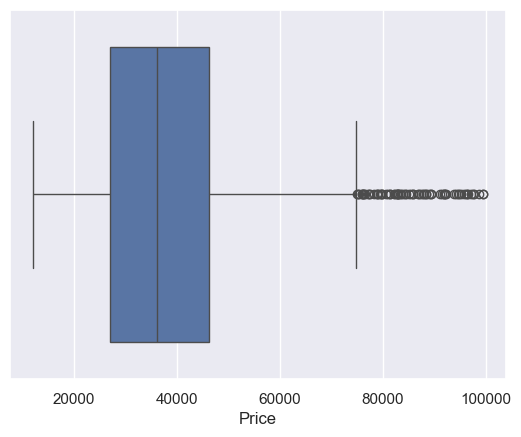

In [1019]:
filtered_df = df[df['Price'] <= 100000]

sns.boxplot(x=filtered_df['Price'])

<Axes: xlabel='City_MPG'>

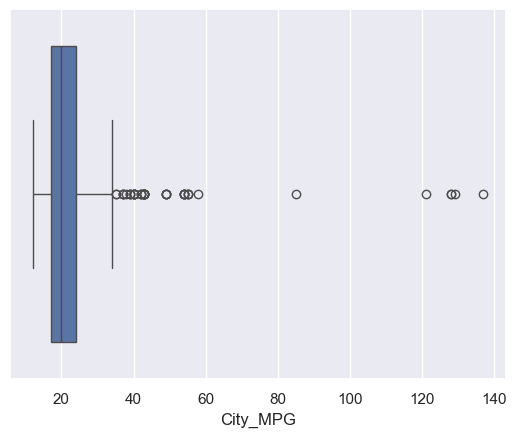

In [1020]:
sns.boxplot(x=df['City_MPG'])

<Axes: xlabel='HP'>

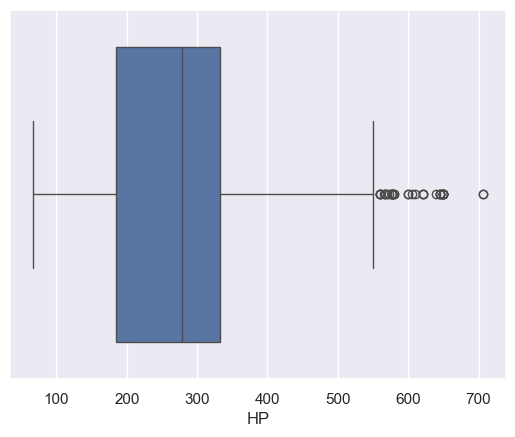

In [1021]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

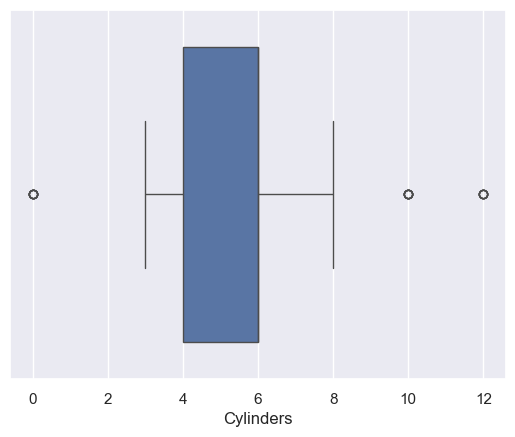

In [1022]:
sns.boxplot(x=df['Cylinders'])

In [1023]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Year,HP,Cylinders,Highway_MPG,City_MPG,Price
count,"1,608.00","1,608.00","1,608.00","1,608.00","1,608.00","1,608.00"
mean,"2,017.00",275.02,5.43,28.28,21.19,"42,196.06"
std,0.00,105.57,1.59,7.68,8.64,"24,206.36"
min,"2,017.00",66.00,0.00,17.00,12.00,"11,990.00"
25%,"2,017.00",185.00,4.00,23.00,17.00,"27,390.00"
50%,"2,017.00",278.00,6.00,27.00,20.00,"36,675.00"
75%,"2,017.00",333.00,6.00,32.00,24.00,"47,820.00"
max,"2,017.00",707.00,12.00,111.00,137.00,"247,900.00"


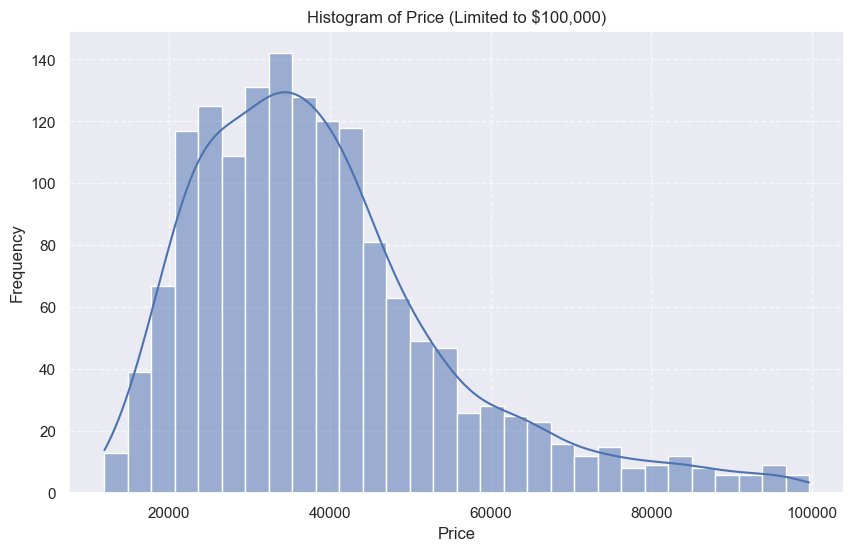

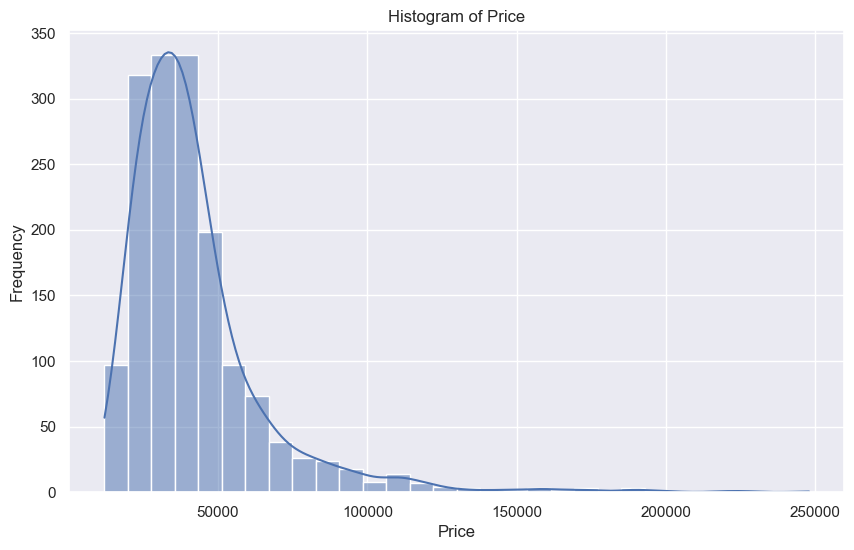

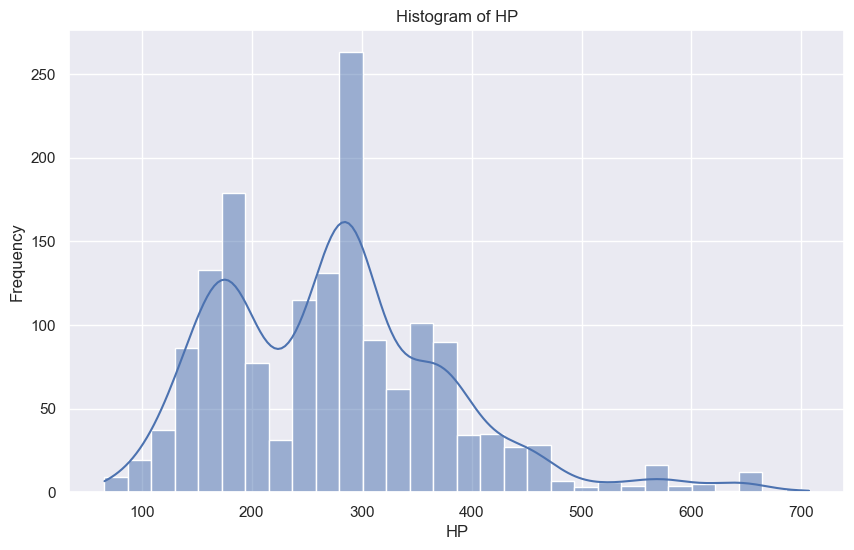

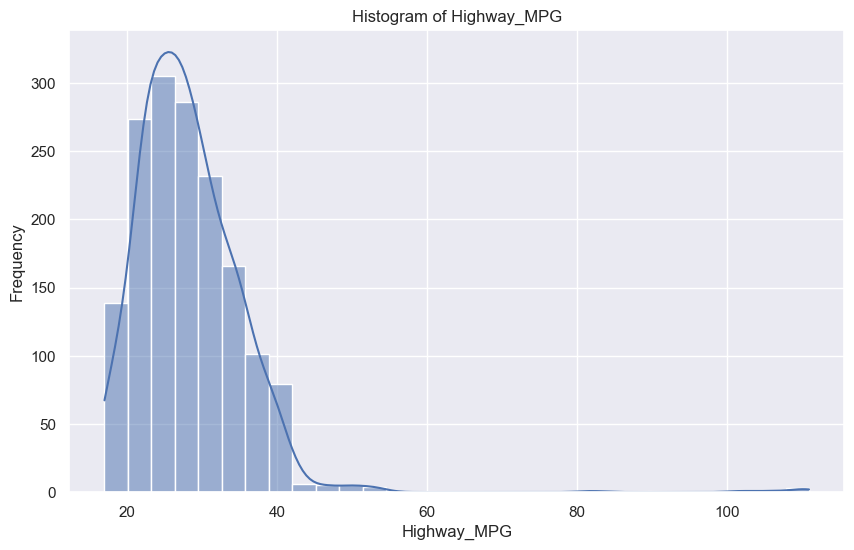

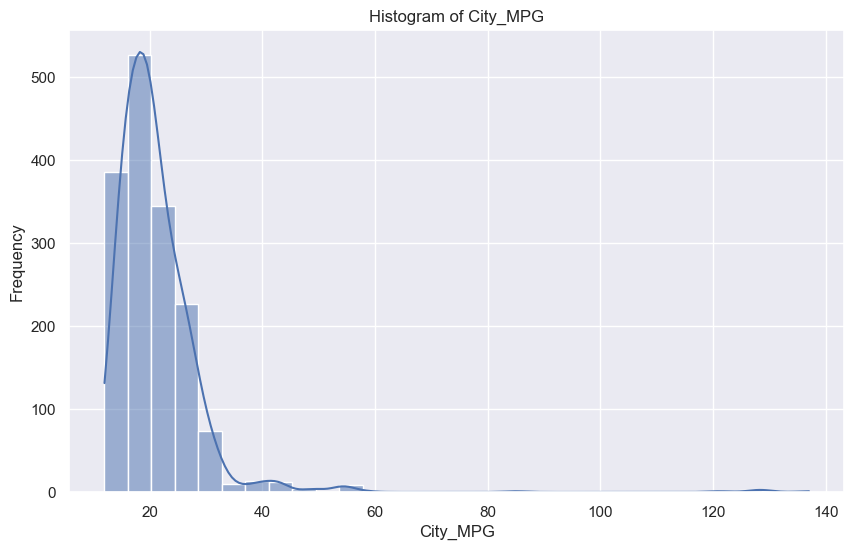

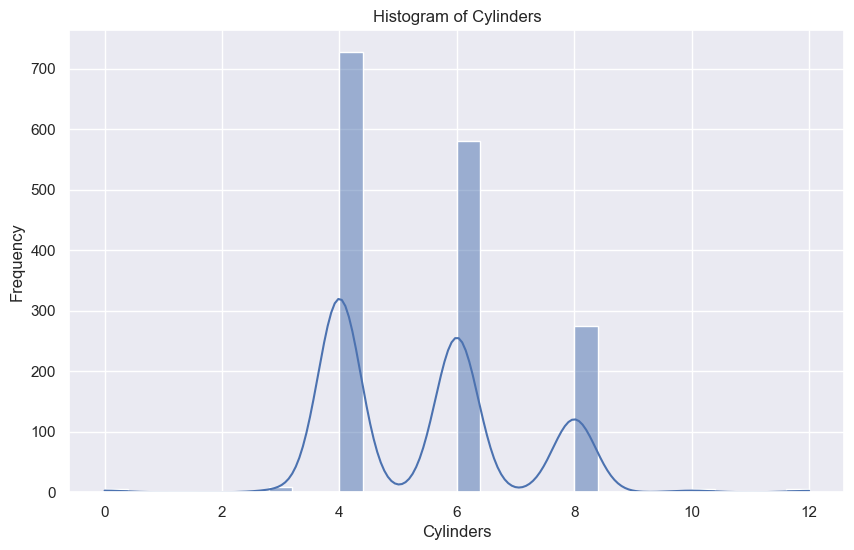

In [1024]:
key_features = ['Price', 'HP', 'Highway_MPG', 'City_MPG', 'Cylinders']

filtered_df = df[df['Price'] <= 100000]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Price', bins=30, kde=True)
plt.title('Histogram of Price (Limited to $100,000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

,HP,Cylinders,Highway_MPG,City_MPG,Price
HP,1.00,0.85,-0.58,-0.52,0.78
Cylinders,0.85,1.00,-0.69,-0.62,0.60
Highway_MPG,-0.58,-0.69,1.00,0.94,-0.35
City_MPG,-0.52,-0.62,0.94,1.00,-0.30
Price,0.78,0.60,-0.35,-0.30,1.00


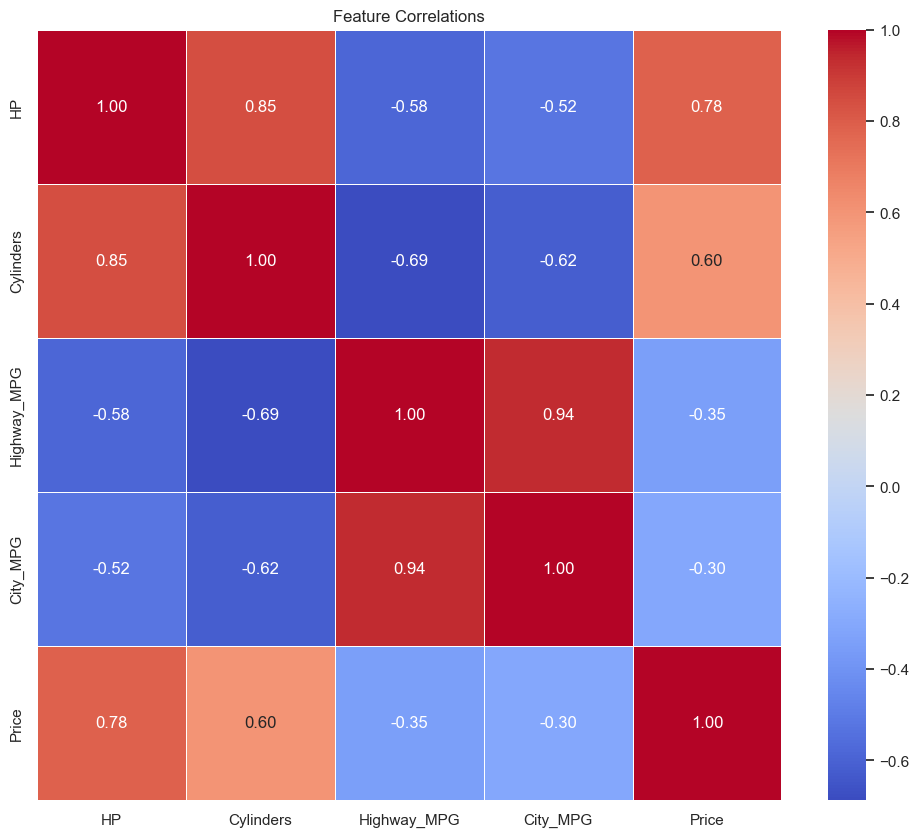

In [1025]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['Year'])

c = numeric_df.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(c, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlations')
c

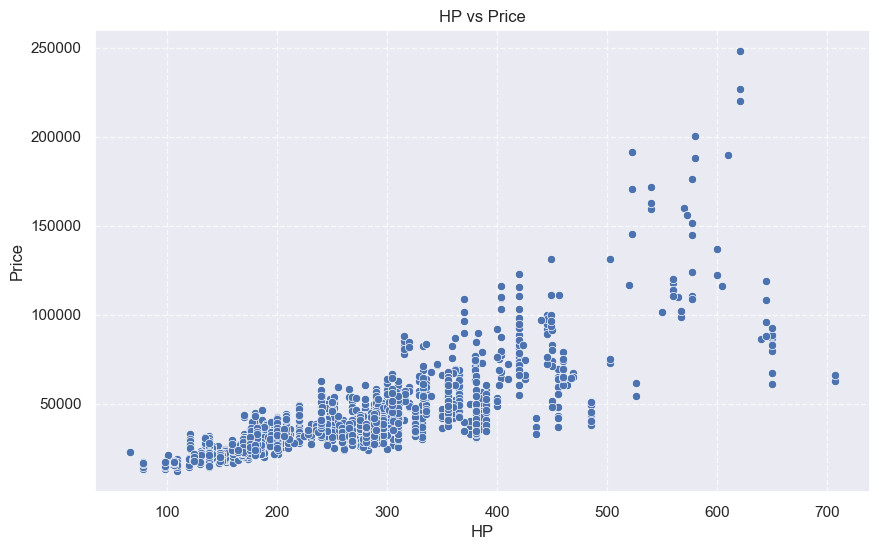

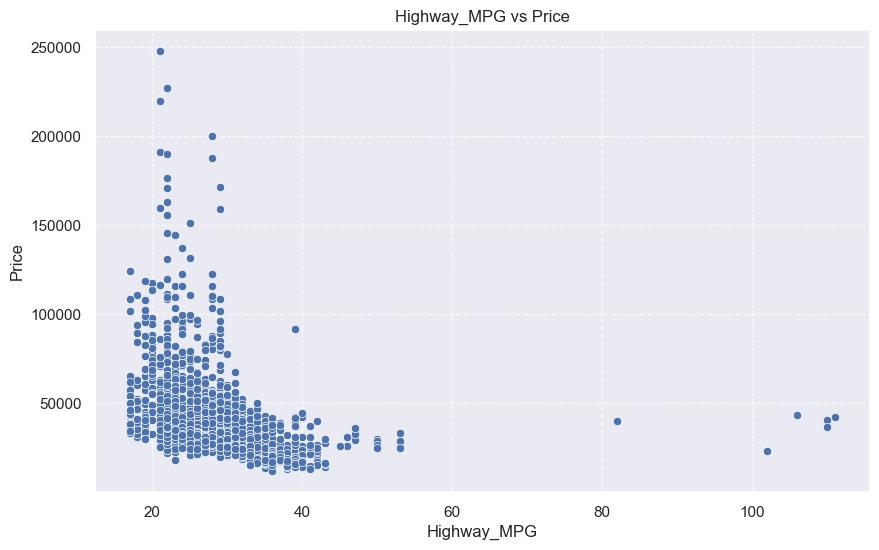

In [1026]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HP', y='Price')
plt.title('HP vs Price')
plt.xlabel('HP')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x='Highway_MPG', y='Price')
plt.title('Highway_MPG vs Price')
plt.xlabel('Highway_MPG')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

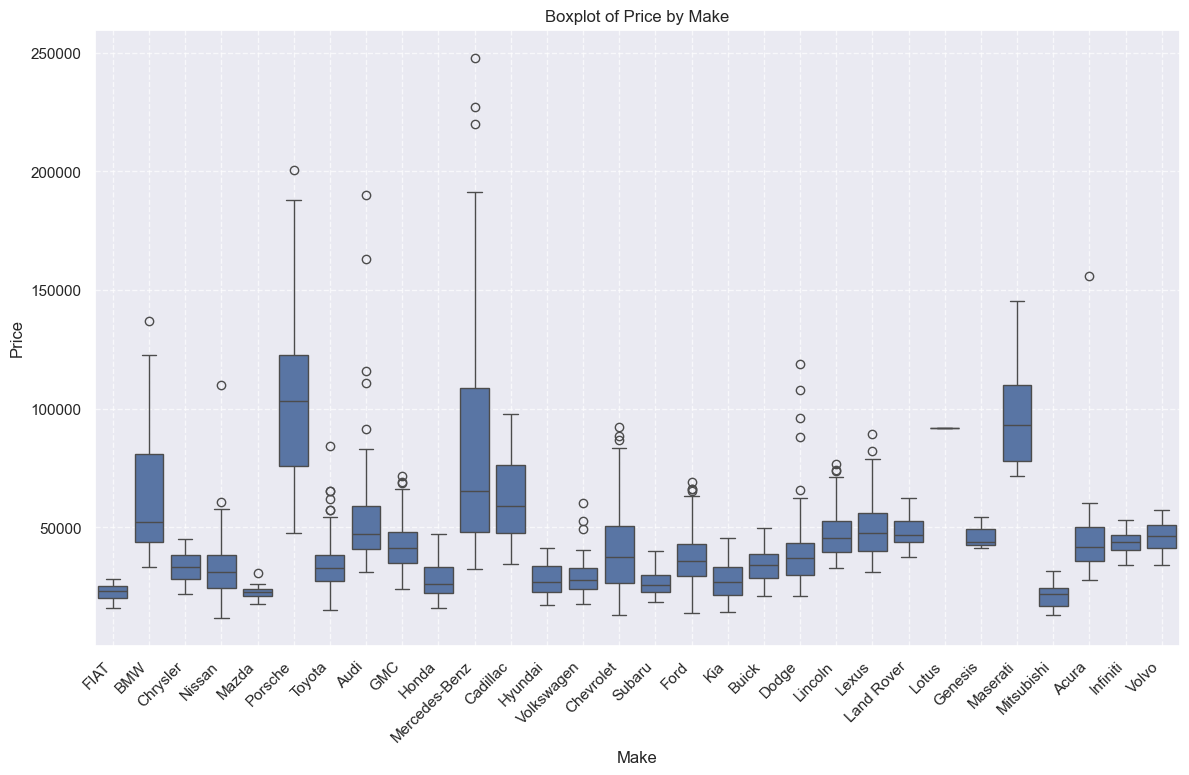

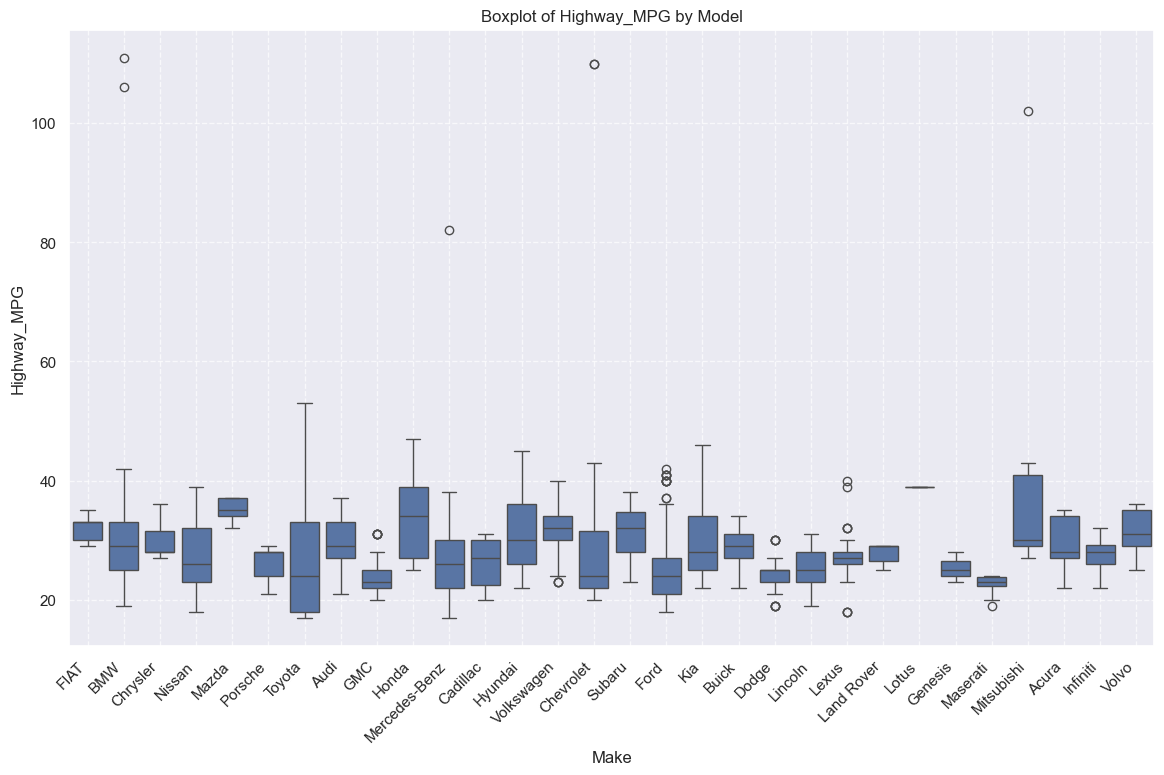

In [1027]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Make', y='Price')
plt.title('Boxplot of Price by Make')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Make', y='Highway_MPG')
plt.title('Boxplot of Highway_MPG by Model')
plt.xlabel('Make')
plt.ylabel('Highway_MPG')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

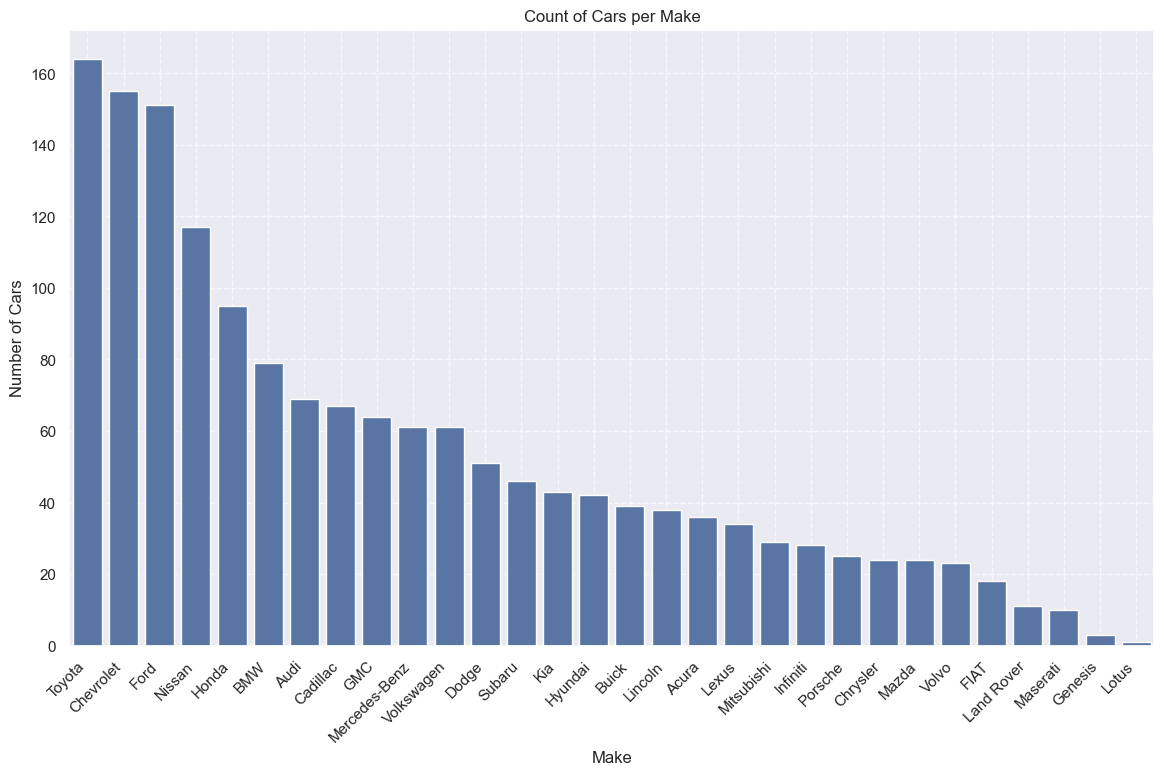

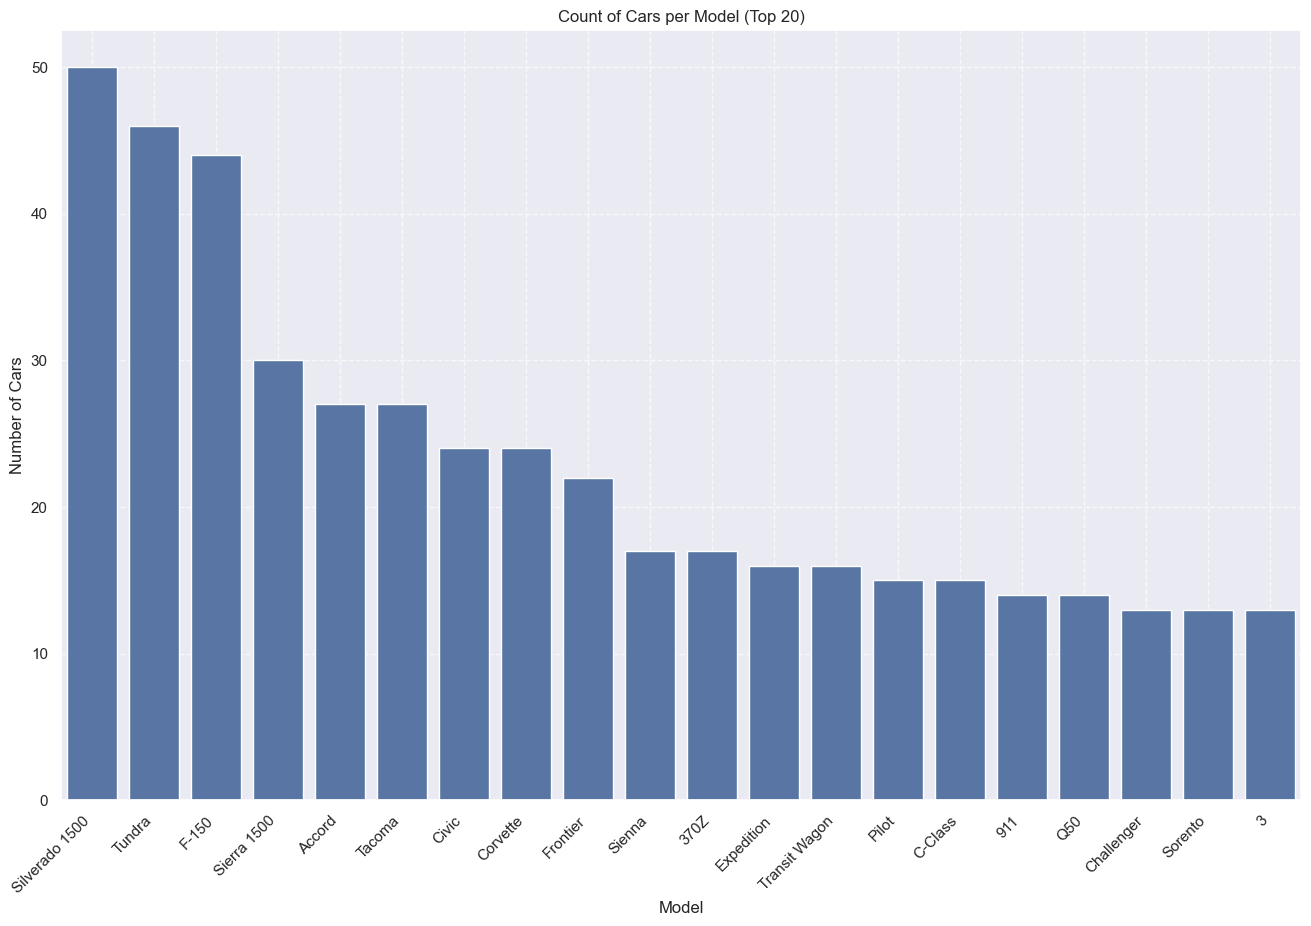

In [1028]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index)
plt.title('Count of Cars per Make')
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

top_models = df['Model'].value_counts().nlargest(20).index  # Show top 20 models

plt.figure(figsize=(16, 10))
sns.countplot(data=df[df['Model'].isin(top_models)], x='Model', order=top_models)
plt.title('Count of Cars per Model (Top 20)')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [1029]:
numTrain = 20   # number of training instances
numTest = df.shape[0] - numTrain

X = df[['HP']]
y = df['Price']

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

In [1030]:
regr =linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

Root mean squared error = 17398.2978
R-squared = 0.4877


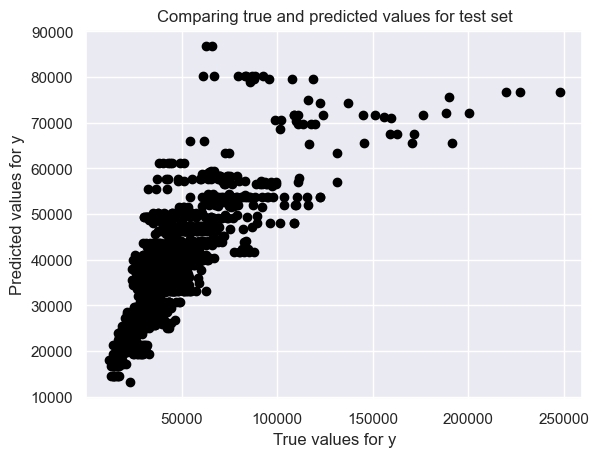

In [1031]:
y_pred_test = np.maximum(0, regr.predict(X_test))

plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

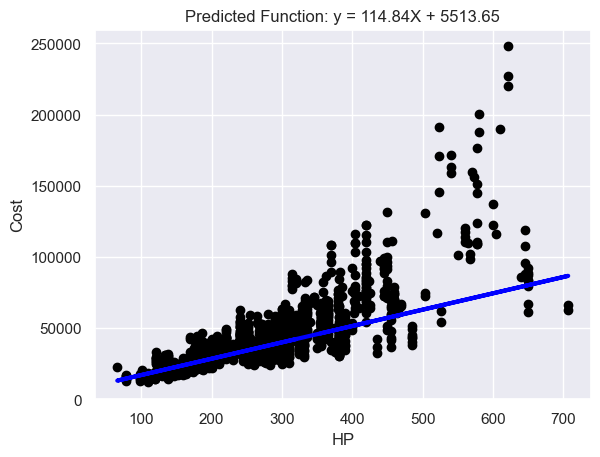

In [1032]:
y_pred_test = [max(0, pred) for pred in y_pred_test]

plt.scatter(X_test, y_test, color='black') 
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)

titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel('HP')
plt.ylabel('Cost')

plt.ylim(bottom=0)

plt.show()

In [1033]:
print('Predicted cost of a car with 200hp = $%.2f' % (regr.coef_[0] * 200 + regr.intercept_))
print('Predicted cost of a car with 300hp = $%.2f' % (regr.coef_[0] * 300 + regr.intercept_))
print('Predicted cost of a car with 400hp = $%.2f' % (regr.coef_[0] * 400 + regr.intercept_))

Predicted cost of a car with 200hp = $28481.66
Predicted cost of a car with 300hp = $39965.66
Predicted cost of a car with 400hp = $51449.66


In [1034]:
df_price = df
df_price = df_price[['Make', 'Model', 'Price', 'HP', 'Highway_MPG']].dropna()

X = df_price[['HP', 'Highway_MPG']]
y = df_price['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1035]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 202831235.8033986


In [1036]:
df_price['predicted_price'] = ridge_model.predict(X_scaled)

df_price['value_metric'] =df_price['predicted_price'] / df_price['Price']

best_value_cars = df_price.sort_values(by='value_metric', ascending=False)

print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

price_ranges = {
    'under_20000': 20000,
    'under_25000': 25000,
    'under_35000': 35000,
    'under_45000': 45000,
    'under_60000': 60000
}
for label, max_price in price_ranges.items():
    filtered_cars = df_price[df_price['Price'] <= max_price]
    best_value_cars = filtered_cars.sort_values(by='value_metric', ascending=False)
    
    print(f"\nTop 10 best value cars under ${max_price}:")
    print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

           Make       Model  Price  predicted_price     HP  Highway_MPG  \
7093       Ford     Mustang  32645        73,168.60 435.00           25   
2467      Dodge  Challenger  37995        82,246.09 485.00           23   
2196  Chevrolet      Camaro  36905        77,255.25 455.00           25   
2506      Dodge     Charger  39995        83,385.23 485.00           25   
2470      Dodge  Challenger  62495       126,468.77 707.00           21   
1984  Chevrolet     Bolt EV  36620        73,564.07 200.00          110   
7091       Ford     Mustang  36645        73,168.60 435.00           25   
7087       Ford     Mustang  25645        50,474.89 310.00           30   
2500      Dodge     Charger  65945       127,038.34 707.00           22   
2474      Dodge  Challenger  42795        82,246.09 485.00           23   

      value_metric  
7093          2.24  
2467          2.16  
2196          2.09  
2506          2.08  
2470          2.02  
1984          2.01  
7091          2.00  
7087  

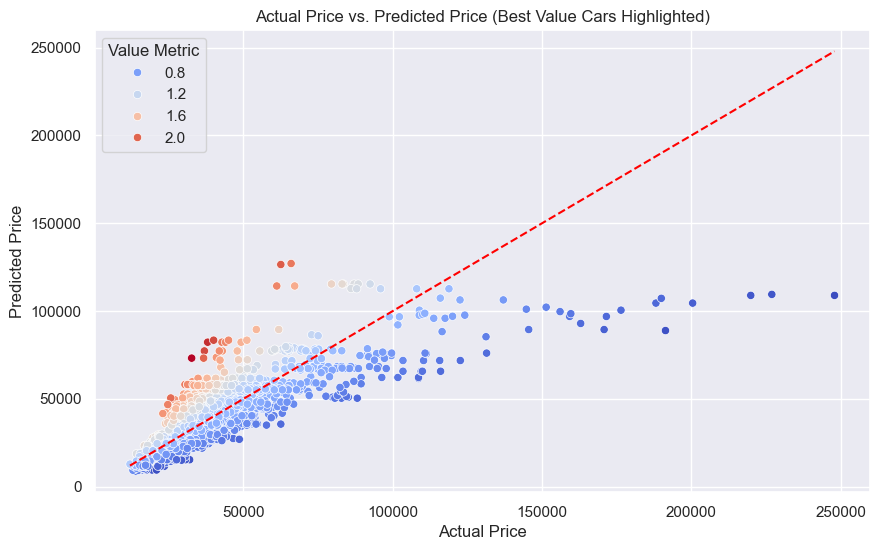

In [1037]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_price, x='Price', y='predicted_price', hue='value_metric', palette='coolwarm')
plt.plot([min(df_price['Price']), max(df_price['Price'])], [min(df_price['Price']), max(df_price['Price'])], color='red', linestyle='--')
plt.title('Actual Price vs. Predicted Price (Best Value Cars Highlighted)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend(title='Value Metric', loc='best')
plt.show()

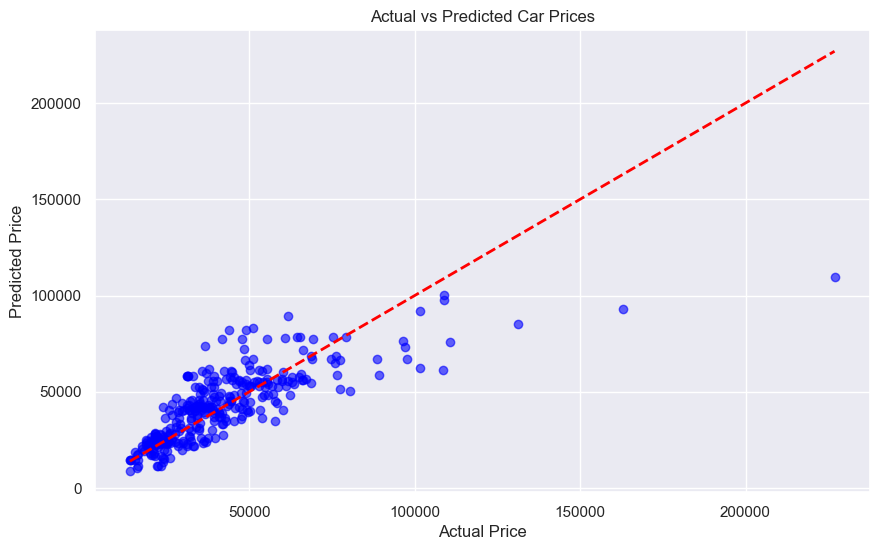

In [1038]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

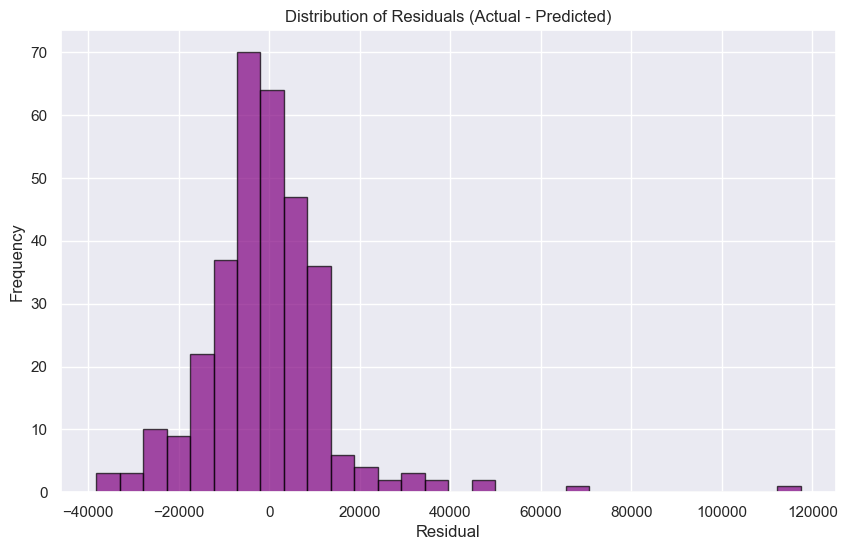

In [1039]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [1040]:
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression Metrics:
MSE: 202831235.8033986
RMSE: 14241.883155095698
R-squared: 0.6091517708183793


In [1041]:
df_price = df
df_price = df_price[['Make', 'Model', 'Price', 'HP', 'Highway_MPG']].dropna()

X = df_price[['HP', 'Highway_MPG']]
y = df_price['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1042]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 117971497.84453844


In [1043]:
df_price['predicted_price'] = decision_tree.predict(X_scaled)

df_price['value_metric'] =  (0.4 * df['HP'] + 0.4 * df['Highway_MPG']) / (0.2 * df['Price'])

best_value_cars = df_price.sort_values(by='value_metric', ascending=False)

print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

price_ranges = {
    'under_20000': 20000,
    'under_25000': 25000,
    'under_35000': 35000,
    'under_45000': 45000,
    'under_60000': 60000
}

for label, max_price in price_ranges.items():
    filtered_cars = df_price[df_price['Price'] <= max_price]
    best_value_cars = filtered_cars.sort_values(by='value_metric', ascending=False)
    
    print(f"\nTop 10 best value cars under ${max_price}:")
    print(best_value_cars[['Make', 'Model', 'Price', 'predicted_price', 'HP', 'Highway_MPG', 'value_metric']].head(10))

            Make          Model  Price  predicted_price     HP  Highway_MPG  \
7093        Ford        Mustang  32645        34,645.00 435.00           25   
2467       Dodge     Challenger  37995        40,395.00 485.00           23   
7088        Ford        Mustang  24645        42,570.00 300.00           27   
7087        Ford        Mustang  25645        42,547.50 310.00           30   
11036     Toyota         Tundra  30400        40,881.15 381.00           18   
11029     Toyota         Tundra  30400        40,881.15 381.00           18   
2196   Chevrolet         Camaro  36905        54,710.83 455.00           25   
5502       Dodge  Grand Caravan  23995        30,070.00 283.00           25   
11043     Toyota         Tundra  31290        40,881.15 381.00           18   
11049     Toyota         Tundra  31290        40,881.15 381.00           18   

       value_metric  
7093           0.03  
2467           0.03  
7088           0.03  
7087           0.03  
11036          0.03 

In [1044]:
importance = decision_tree.feature_importances_
features = X.columns

for feature, importance in zip(features, importance):
    print(f'Feature: {feature}, Importance: {importance}')


Feature: HP, Importance: 0.9218567990447936
Feature: Highway_MPG, Importance: 0.07814320095520635


In [1045]:
mse_tree = mean_squared_error(y_test, y_pred)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred)

print("\nDecision Tree Metrics:")
print(f"MSE: {mse_tree}")
print(f"RMSE: {rmse_tree}")
print(f"R-squared: {r2_tree}")


Decision Tree Metrics:
MSE: 117971497.84453844
RMSE: 10861.4684939256
R-squared: 0.7726733220166643


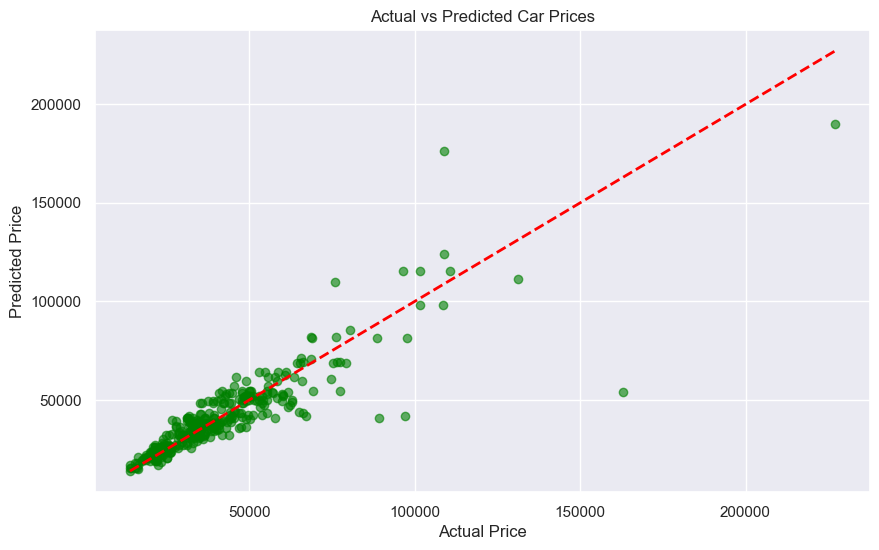

In [1046]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

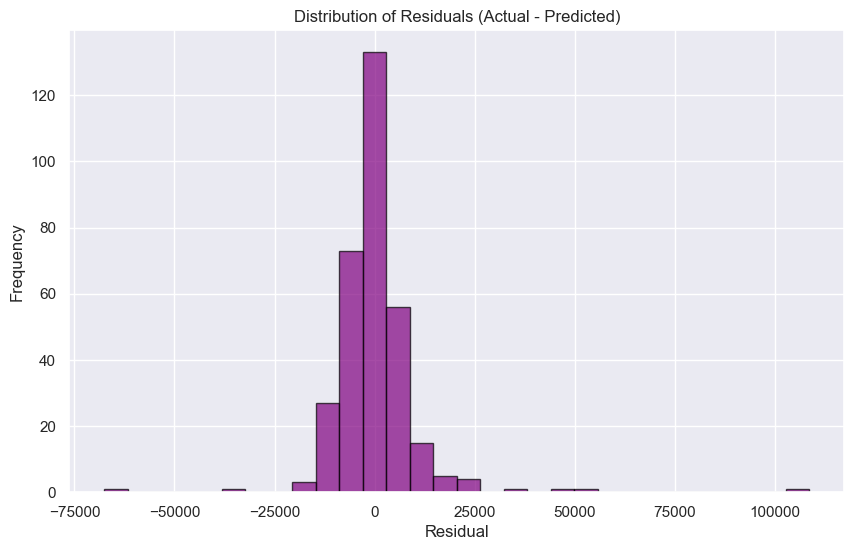

In [1047]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [1049]:
cursor.close()
connection.close()